# **Notebook to directly plot the prompts for better and faster Prototyping.**

In [1]:
from typing import List, Dict

In [2]:
import os
os.environ['GROQ_API_KEY'] = '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'

In [3]:
#Setting Groq client

from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

In [4]:
#Exploring Groq API

chat_completion = GroqClient.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
        },
        {
            "role": "user",
            "content": "Who was the first U.S.A. President?",
        }
    ],
    model="llama3-70b-8192",
    #Temperature controls randomness: As the temperature approaches zero, the model will become deterministic and repetitive, Values from 0 to 2 - can be float.
    #If you adjust the temperature to 0.5, the model will generate text that is more predictable and less creative than if you set the temperature to 1.0.
    temperature=0.8,
    #Max output Tokens
    max_tokens=8192,
    #Top_P controls diversity via nucleus sampling: 0.5 means half of all likelihood-weighted options are considered, Values from 0 to 1 - can be float.
    #If you set top p to 0.9, the model will only consider the most likely words that make up 90% of the probability mass.
    top_p=1,
    seed=7688,
    stream=False,
    #stream=True,
    #response_format={"type": "json_object"},
    stop=None,
)

#If Stream set to True
#for chunk in chat_completion:
#    print(chunk.choices[0].delta.content or "", end="")

#If Stream set to False and response format not JSON
print(chat_completion.choices[0].message.content)

#If using JSON output, ensure Stream is set to False and System prompt contains the word JSON contextualized such as "You always return your answer in JSON format.".
#print(chat_completion.choices[0].message)

The first President of the United States of America was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution and was unanimously elected as the first President of the United States by the Electoral College.

Washington's presidency set many important precedents for the executive branch of government, including the decision to serve only two terms and the establishment of a cabinet system. He is also known for his role in shaping the country's financial and economic systems, as well as his leadership during the Whiskey Rebellion, a tax protest in western Pennsylvania.

Washington is widely regarded as one of the most important figures in American history, and his legacy has endured for centuries. He is often

In [5]:
def GetAnswerGroqLlama70b(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = Stream,
    stop = None
)
    return LlamaChat.choices[0].message.content

In [6]:
#Testing the Function

messages=[
    {
        "role": "system",
        "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
    },
    {
        "role": "user",
        "content": "Who was the first U.S.A. President?",
    }
    ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

TestLlamaFunc = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(TestLlamaFunc)

That's an easy one! The first President of the United States was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution, and his leadership and integrity earned him the respect and admiration of the American people.

In fact, he's the only president in U.S. history to be unanimously elected by the Electoral College, receiving all 69 electoral votes in the first presidential election in 1789. He's also the only president to have served two terms without facing opposition, as he was re-elected in 1792 with another unanimous vote.

Washington's legacy has endured for centuries, and he remains one of the most revered figures in American history. He's often referred to as the "Father of the Country," and his image

# **Implementation**

In [7]:
#Importing Libraries

#Data Wrangling
import pandas as pd
import numpy as np

#Date and Time Manipulation
from datetime import datetime
from datetime import timedelta

#JSON handling
import json

#Plotting
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
from matplotlib.patches import Rectangle

/home/nomad/Desktop/PlsHireMe/PHMvenv/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [8]:
btcdata = pd.read_csv("btcusdlast100.csv")

btcdata.drop(["Adj Close"], axis=1, inplace=True)
btcdata

,Date,Open,High,Low,Close,Volume
0,2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,2024-03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976
...,...,...,...,...,...,...
95,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,27403884779
96,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,14121265576
97,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,13281140541
98,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,30006354476


In [9]:
btcdataplot = btcdata.copy()

In [10]:
btcdataplot

,Date,Open,High,Low,Close,Volume
0,2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,2024-03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976
...,...,...,...,...,...,...
95,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,27403884779
96,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,14121265576
97,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,13281140541
98,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,30006354476


In [11]:
# Since we are going to work with data from only 2024, we are going to format that Data by Dropping the year

btcdata["Date"] = btcdata["Date"].apply(lambda x: x[5:])

btcdata.head()

,Date,Open,High,Low,Close,Volume
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976


In [12]:
btcdataplot

,Date,Open,High,Low,Close,Volume
0,2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,2024-03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976
...,...,...,...,...,...,...
95,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,27403884779
96,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,14121265576
97,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,13281140541
98,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,30006354476


In [13]:
#Converting to Numpy for Faster Calc

btcdatanp = btcdata.to_numpy() 
btcdatanp.shape

(100, 6)

In [14]:
#HL ZigZag
#Calculating ZigZag

zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcdatanp[0][0], btcdatanp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcdatanp)):

    High = btcdatanp[x][2]
    Low = btcdatanp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcdatanp[x][0], level])
        StartPoint = level 

zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,03-11,69020.546875
1,03-14,73750.070313
2,03-17,64545.316406
3,03-18,68897.132813
4,03-20,60807.785156


In [15]:
#HL ZigZag
#Calculating ZigZag

btcdataplotnp = btcdataplot.to_numpy() 

zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcdataplotnp[0][0], btcdataplotnp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcdataplotnp)):

    High = btcdataplotnp[x][2]
    Low = btcdataplotnp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdataplotnp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdataplotnp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcdataplotnp[x][0], level])
        StartPoint = level 

zzplotdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzplotdf.head()

,Date,ZZ
0,2024-03-11,69020.546875
1,2024-03-14,73750.070313
2,2024-03-17,64545.316406
3,2024-03-18,68897.132813
4,2024-03-20,60807.785156


In [16]:
btcdata.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]

,Date,Open,High,Low,Close
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438
...,...,...,...,...,...
95,06-14,66747.570313,67294.648438,65056.894531,66011.093750
96,06-15,66006.742188,66402.187500,65871.773438,66191.000000
97,06-16,66189.359375,66894.843750,66018.250000,66639.046875
98,06-17,66636.515625,67188.320313,65094.964844,66490.296875


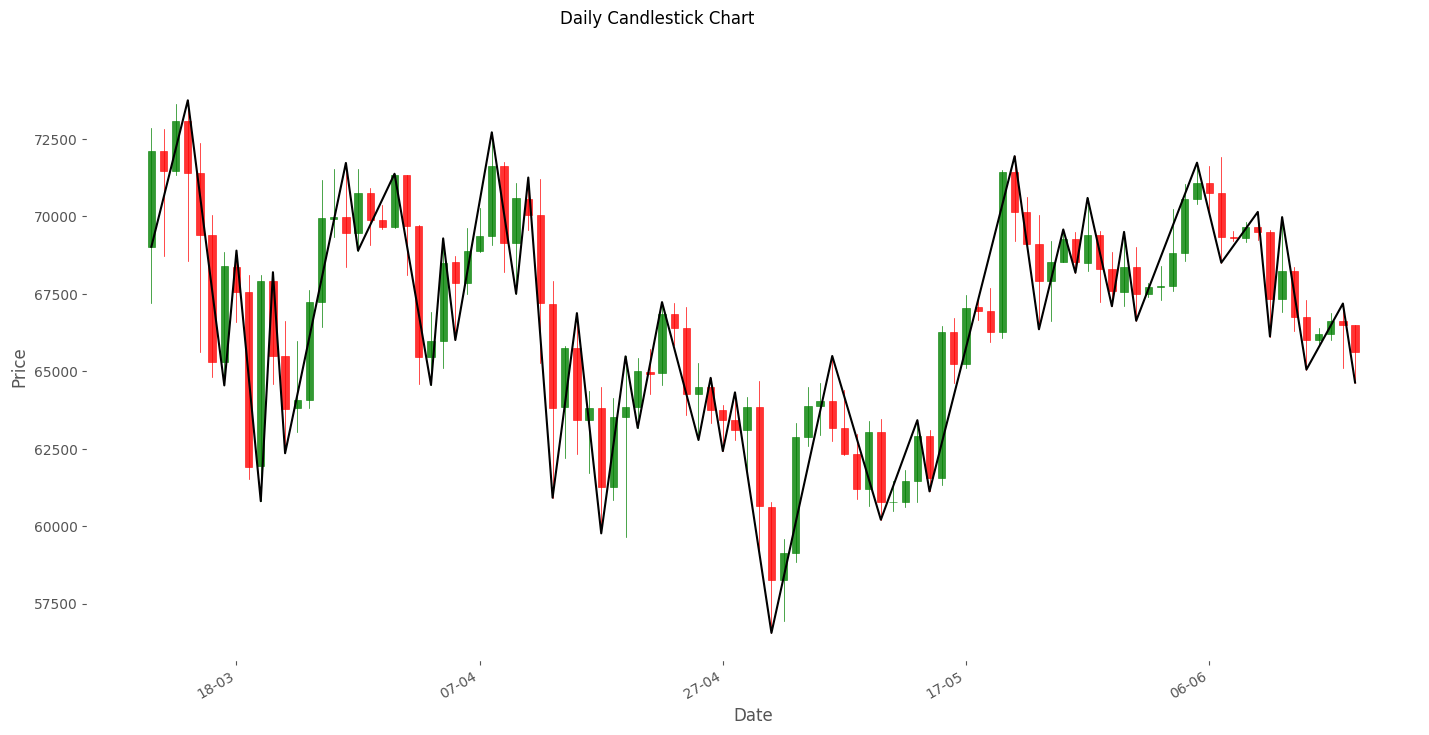

In [17]:
#Plotting HighLow ZigZag

#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcdataplot.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%Y-%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzplotdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format="%Y-%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [18]:
#Converting ZZ DF to text

TextZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])
#print(TextZZ)

# **First Prompt**

In [19]:
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

In [20]:
FirstQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

In [21]:
FirstPromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

In [22]:
FirstPromptComplete = FirstPromptTemplate.replace("{QUESTION}", FirstQuery).replace("{DATASET}", TextZZ)
print(FirstPromptComplete)


I want you to:


Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.


The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

03-11, 69020.55
03-14, 73750.07
03-17, 64545.32
03-18, 68897.13
03-20, 60807.79
03-21, 68199.99


In [23]:
messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": FirstPromptComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

FirstAnswer = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [24]:
print(FirstAnswer)

Key levels of support and resistance identified through the frequency and clustering of ZigZag Indicator values are:

* Support around 60,000 (5 touches)
* Support around 65,000 (6 touches)
* Resistance around 68,000 (7 touches)
* Resistance around 71,000 (5 touches)
* Resistance around 72,000 (4 touches)
* Support around 62,000 (4 touches)
* Resistance around 69,000 (4 touches)


In [28]:
FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format without adding commas to numbers.
'''

def Formatting(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = False,
    response_format={"type": "json_object"},    
    stop = None
)
    return LlamaChat.choices[0].message

messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": FirstPromptComplete
            },
            {
                "role": "user",
                "content": FirstAnswer
            },
            {
                "role": "user",
                "content": FormatTemplate
            }
            ]

FirstFormat = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [29]:
FirstDict = json.loads(FirstFormat)

FirstDict

[{'Area Type': 'Support', 'Area Level': 60000, 'Number of Bounces': 5},
 {'Area Type': 'Support', 'Area Level': 65000, 'Number of Bounces': 6},
 {'Area Type': 'Resistance', 'Area Level': 68000, 'Number of Bounces': 7},
 {'Area Type': 'Resistance', 'Area Level': 71000, 'Number of Bounces': 5},
 {'Area Type': 'Resistance', 'Area Level': 72000, 'Number of Bounces': 4},
 {'Area Type': 'Support', 'Area Level': 62000, 'Number of Bounces': 4},
 {'Area Type': 'Resistance', 'Area Level': 69000, 'Number of Bounces': 4}]

In [35]:
FirstDict.sort(key= lambda x: int(x["Area Level"]))
FirstDict

[{'Area Type': 'Support', 'Area Level': 60000, 'Number of Bounces': 5},
 {'Area Type': 'Support', 'Area Level': 62000, 'Number of Bounces': 4},
 {'Area Type': 'Support', 'Area Level': 65000, 'Number of Bounces': 6},
 {'Area Type': 'Resistance', 'Area Level': 68000, 'Number of Bounces': 7},
 {'Area Type': 'Resistance', 'Area Level': 69000, 'Number of Bounces': 4},
 {'Area Type': 'Resistance', 'Area Level': 71000, 'Number of Bounces': 5},
 {'Area Type': 'Resistance', 'Area Level': 72000, 'Number of Bounces': 4}]

In [46]:
FirstFormatted = []

for x in range(1, len(FirstDict)):
    if abs(int(FirstDict[x]["Area Level"]) - int(FirstDict[x-1]["Area Level"])) <= 1000:
        if len(FirstFormatted) > 0:
            if "Area Range" in list(FirstFormatted[-1].keys()):
                RangeStart = FirstFormatted[-1]["Area Range"].split("-")[0]
                Temp = {"Area Type": FirstDict[x]["Area Type"] + " Area", "Area Range": RangeStart + "-" + FirstDict[x]["Area Level"], "Bounces": int(FirstFormatted[-1]["Bounces"]) + int(FirstDict[x]["Number of Bounces"])}
                
                FirstFormatted.pop()
                FirstFormatted.append(Temp)

                continue
                
            else:
                FirstFormatted.pop()

        FirstFormatted.append({"Area Type": FirstDict[x]["Area Type"] + " Area", "Area Range": str(FirstDict[x-1]["Area Level"]) + "-"  + str(FirstDict[x]["Area Level"]), "Bounces": int(FirstDict[x-1]["Number of Bounces"]) + int(FirstDict[x]["Number of Bounces"])})
    
    else:
        if len(FirstFormatted) == 0:
            FirstFormatted.append({"Area Type": FirstDict[x-1]["Area Type"] + " Level", "Area Level": int(FirstDict[x-1]["Area Level"]), "Bounces": int(FirstDict[x-1]["Number of Bounces"])})
        FirstFormatted.append({"Area Type": FirstDict[x]["Area Type"] + " Level", "Area Level": int(FirstDict[x]["Area Level"]), "Bounces": int(FirstDict[x]["Number of Bounces"])})

In [71]:
pd.DataFrame(FirstFormatted).to_csv("suppres.csv", index=False)
FirstFormatted

[{'Area Type': 'Support Level', 'Area Level': 60000, 'Bounces': 5},
 {'Area Type': 'Support Level', 'Area Level': 62000, 'Bounces': 4},
 {'Area Type': 'Support Level', 'Area Level': 65000, 'Bounces': 6},
 {'Area Type': 'Resistance Area', 'Area Range': '68000-69000', 'Bounces': 11},
 {'Area Type': 'Resistance Area', 'Area Range': '71000-72000', 'Bounces': 9}]

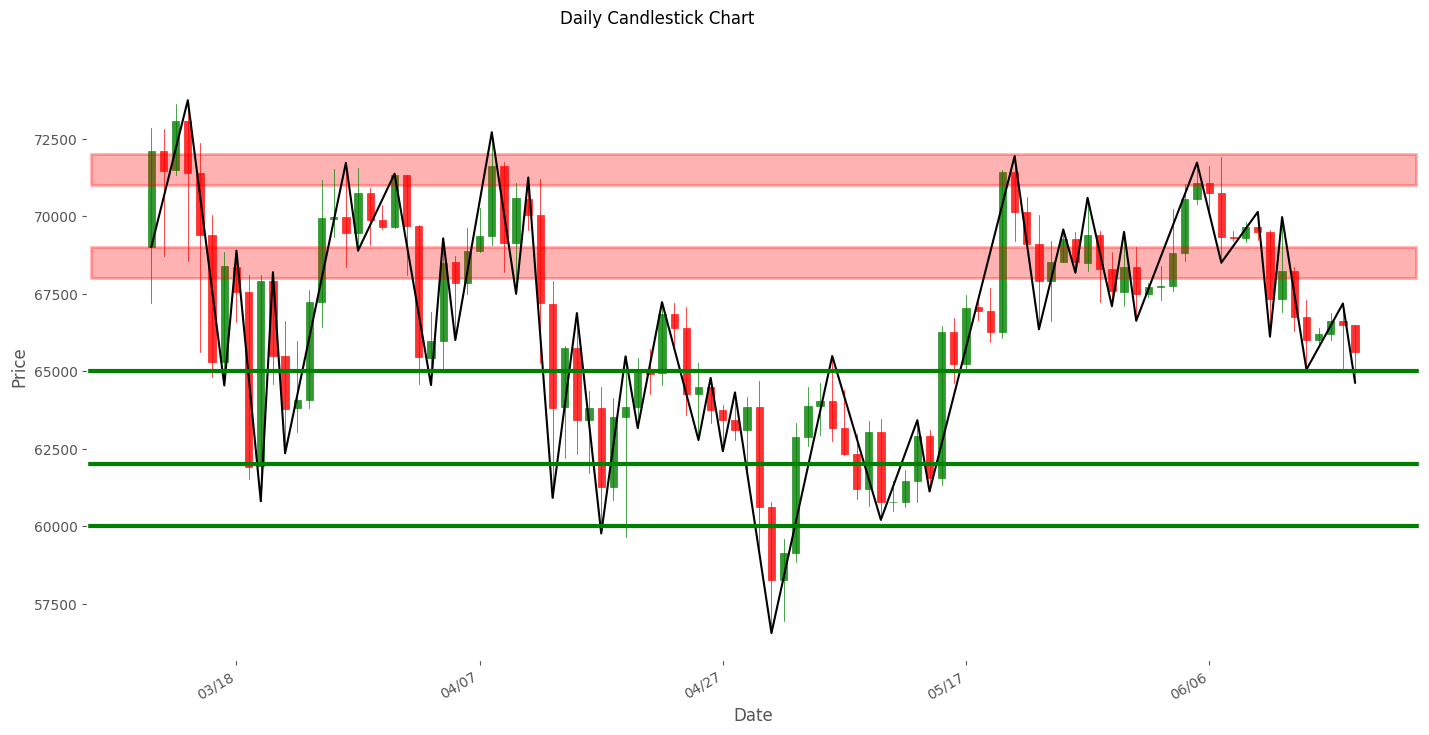

In [52]:
#PlottingAnswer

plt.style.use('ggplot')

SuppRes = FirstFormatted.copy()
btc = btcdataplot.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%Y-%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzplotdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format="%Y-%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

for x in SuppRes:
    AreaType = x["Area Type"].split(" ")

    AreaColor = "Gray"
    
    if AreaType[0] == "Support":
        AreaColor = "Green"

    elif AreaType[0] == "Resistance":
        AreaColor = "Red"

    if AreaType[-1] == "Level":
        #Plotting Level as Horizontal Line
        plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
        
    elif AreaType[-1] == "Area":
        #Plotting Area as RectangleBox
        Bounds = x["Area Range"].split("-")
        
        UpperBound = int(Bounds[-1])
        LowerBound = int(Bounds[0])

        RangeDiff = abs(UpperBound - LowerBound)

        StartDate = pd.to_datetime(btc.Date.iloc[0], format="%Y-%m-%d")
        
        ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))
    
    else:
        #Skipping for now in case of Formatting Error
        continue
        
plt.show()

---

# **Building an Inference Class**

In [53]:
#Prompts 
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

FirstQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

FirstPromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

DatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])


In [54]:
#Wrapping Up Section

#Setting Groq client
from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

#Wrapping Up Inference as Class
class Inference:
    def __init__(self, Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool):
        self.Model = Llama
        self.Temperature = Temperature
        self.MaxTokens = MaxTokens
        self.TopP = TopP
        self.Seed = Seed
        self.Stream = Stream

    #Inference from Complete Prompt and for Formatting to JSON
    def Inference(self, Chat: List[Dict[str, str]]) -> str:
        InferenceOutput = GroqClient.chat.completions.create(
                messages = Chat,
                model = self.Model,
                temperature = self.Temperature,
                max_tokens = self.MaxTokens,
                top_p = self.TopP,
                seed = self.Seed,
                stream = self.Stream,
                stop = None
            )
        
        return InferenceOutput.choices[0].message.content
    
    #Better Parsing and Formatting for Plotting
    def FormatForPlotting(self, InferenceOutputJSON: List[Dict]) -> List[Dict]:
        FormattedOutput = []
        
        for x in range(1, len(InferenceOutputJSON)):
            if abs(int(InferenceOutputJSON[x]["Area Level"]) - int(InferenceOutputJSON[x-1]["Area Level"])) <= 1000:
                if len(FormattedOutput) > 0:
                    if "Area Range" in list(FormattedOutput[-1].keys()):
                        RangeStart = FormattedOutput[-1]["Area Range"].split("-")[0]
                        Temp = {"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(RangeStart) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(FormattedOutput[-1]["Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])}
                        
                        FormattedOutput.pop()
                        FormattedOutput.append(Temp)
        
                        continue
                        
                    else:
                        FormattedOutput.pop()
        
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(InferenceOutputJSON[x-1]["Area Level"]) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])})
            
            else:
                if len(FormattedOutput) == 0:
                    FormattedOutput.append({"Area Type": InferenceOutputJSON[x-1]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x-1]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"])})
                
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x]["Number of Bounces"])})

        return FormattedOutput
        
    #Building the Plot
    def ReturnPlot(self, FormattedOutput: List[Dict], btcdata: pd.DataFrame, zigzagdata: pd.DataFrame) -> Figure:
        plt.style.use('ggplot')

        SuppRes = FormattedOutput.copy()
        btc = btcdata.copy()

        # Extracting Data for plotting
        ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
        ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
        ohlc = ohlc.astype(float)
        
        zigzagplot = zzdf.copy()
        zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
        zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
        zigzagplot = zigzagplot.astype(float)

        # Creating Subplots
        fig, ax = plt.subplots()
        
        #Plotting Candlesticks Chart
        candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
        
        #Plotting ZigZag Indicator
        ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")
        
        # Setting labels & titles
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_facecolor('white')
        fig.suptitle('Daily Candlestick Chart')
        
        # Formatting Date
        date_format = mpl_dates.DateFormatter('%m/%d')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        
        fig.tight_layout()
        fig.set_size_inches(16,8)
        
        #Adding levels and areas to Plot
        
        for x in SuppRes:
            AreaType = x["Area Type"].split(" ")
        
            AreaColor = "Gray"
            
            if AreaType[0] == "Support":
                AreaColor = "Green"
        
            elif AreaType[0] == "Resistance":
                AreaColor = "Red"
        
            if AreaType[-1] == "Level":
                #Plotting Level as Horizontal Line
                plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
                
            elif AreaType[-1] == "Area":
                #Plotting Area as RectangleBox
                Bounds = x["Area Range"].split("-")
                
                UpperBound = int(Bounds[-1])
                LowerBound = int(Bounds[0])
        
                RangeDiff = abs(UpperBound - LowerBound)
        
                StartDate = pd.to_datetime(btc.Date.iloc[0], format = "%m-%d")
                
                ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
                     edgecolor = AreaColor,
                     facecolor = AreaColor,
                     fill = True,
                     lw = 2,
                     alpha = 0.3))
            
            else:
                #Skipping for now in case of Formatting Error
                continue
        
        return fig

# **Testing the Inference Class**

In [55]:
Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

In [56]:
FirstFullPrompt = FirstPromptTemplate.replace("{QUESTION}", FirstQuery).replace("{DATASET}", TextZZ)
Chat = [
        {
            "role": "system",
            "content": SystemPrompt
        },
        {
            "role": "user",
            "content": FirstFullPrompt
        },
    ]

Answer = Llama.Inference(Chat)
print(Answer)

Here is the technical summary:

The price action has formed significant support levels around 60,000 (touched 4 times), 65,000 (touched 6 times), and 68,000 (touched 5 times). On the resistance side, notable levels are around 70,000 (touched 5 times), 71,000 (touched 3 times), and 72,000 (touched 2 times). These levels are crucial as they have been repeatedly tested, indicating their importance in the market's price dynamics.


In [62]:
Chat[0]["content"] = Chat[0]["content"] + \
"Eventually, the returned answers must be in JSON format if specifically requested by the user."

Chat.append({
            "role": "assistant",
            "content": Answer
            })
Chat.append({
            "role": "user",
            "content": FormatTemplate
            })

AnswerJSON = json.loads(Llama.Inference(Chat))

print(AnswerJSON)

[{'Area Type': 'Support', 'Area Level': 60000, 'Number of Bounces': 4}, {'Area Type': 'Support', 'Area Level': 65000, 'Number of Bounces': 6}, {'Area Type': 'Support', 'Area Level': 68000, 'Number of Bounces': 5}, {'Area Type': 'Resistance', 'Area Level': 70000, 'Number of Bounces': 5}, {'Area Type': 'Resistance', 'Area Level': 71000, 'Number of Bounces': 3}, {'Area Type': 'Resistance', 'Area Level': 72000, 'Number of Bounces': 2}]


In [63]:
FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)
print(FormattedForPlot)

[{'Area Type': 'Support Level', 'Area Level': 60000, 'Bounces': 4}, {'Area Type': 'Support Level', 'Area Level': 65000, 'Bounces': 6}, {'Area Type': 'Support Level', 'Area Level': 68000, 'Bounces': 5}, {'Area Type': 'Resistance Area', 'Area Range': '70000-72000', 'Bounces': 10}]


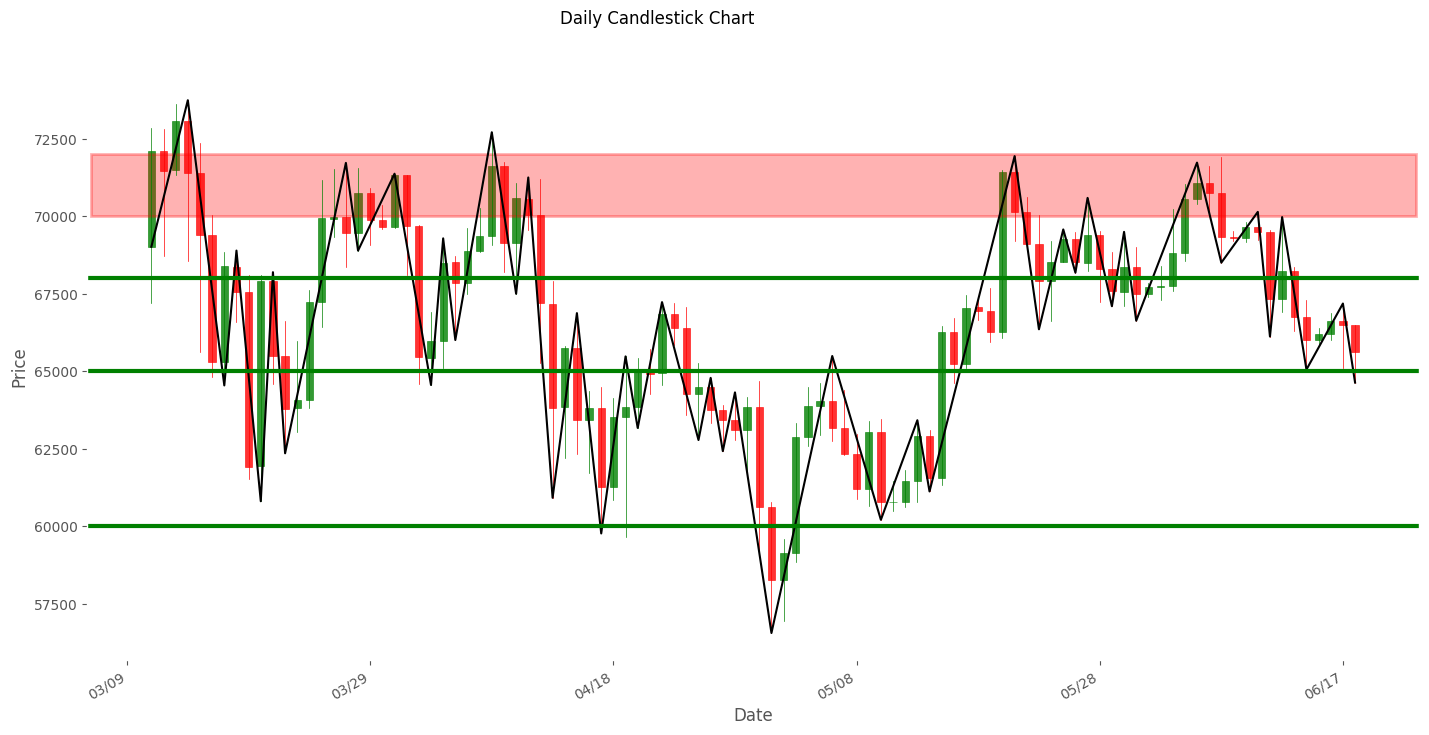

In [64]:
fig = Llama.ReturnPlot(FormattedForPlot, btcdata, zzdf)

# **Wrapper Function around Class to make it even easier.**
# **Used to play with the Prompts Techniques and automate plotting to get visual results immediately.**

In [65]:
#Wrapping up all Together for Faster Prototyping

model = "llama3-70b-8192"
temperature = 0.8
max_tokens = 8192
top_p = 1
seed = 7688
stream = False

Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

#This function automates all the steps from Prompting to Plotting. (Few-shot w/ no Self-Consistency)
#Step 1) Takes the Prompt Template and build the (First) Final Full Prompt (First User Entry) with QueryInstructionPrompt and Contextual Text Data.
#Step 2) Build the Initial Chain with Chat History as SystemPrompt -> First User Entry (First Full Prompt).
#Step 3) First Inference on the Chain built in Step 2. -> Returns Output as FirstChainAnswer.
#Step 4) Creates a Copy of the Starting ChatChain built in Step 2, then Slightly Modifies the System Prompt to return JSON and Appends to the Chain the Answer Obtained in Step 3 and Formats the Output as JSON.
#Step 5) Formats for Plotting the JSON Answer Obtained in Step 4.
#Step 6) Builds the Plot with the Data Obtained in Step 5 and Return the Matplotlib Pyplot Figure Object.
#Step 7) Finally Returns the Plot obtained in Step 6.

#NOTE: The Function yields values along the way for better Debugging and Tracing.

def PromptToPlot(DataOHLC: pd.DataFrame, ContextData: pd.DataFrame, SystemPrompt: str, QueryInstructionPrompt:str, ContextDataText: str,  InputPromptTemplate: str, FormatTemplate: str) -> Figure:    
    #Step 1
    StartingFullPrompt = InputPromptTemplate.replace("{QUESTION}", QueryInstructionPrompt).replace("{DATASET}", ContextDataText)

    #Yielding Step 1
    yield StartingFullPrompt
    
    #Step 2
    ChatChain = [
                    {
                        "role": "system",
                        "content": SystemPrompt
                    },
        
                    {
                        "role": "user",
                        "content": StartingFullPrompt
                    },
                ]

    #Step 3
    FirstChainAnswer = Llama.Inference(ChatChain)

    #Yielding Step 3
    yield FirstChainAnswer
    
    #Step 4
    FormatChain = ChatChain.copy()
    
    FormatChain[0]["content"] = Chat[0]["content"] + \
    "Eventually, the returned answers must be in JSON format if specifically requested by the user."

    FormatChain.append({
                "role": "assistant",
                "content": FirstChainAnswer
                })
    
    FormatChain.append({
                "role": "user",
                "content": FormatTemplate
                })

    AnswerJSON = json.loads(Llama.Inference(FormatChain))

    #Yielding Step 4
    yield AnswerJSON
    
    #Step 5
    FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)

    #Yielding Step 5
    yield FormattedForPlot
    
    #Step 6
    Plot = Llama.ReturnPlot(FormattedForPlot, DataOHLC, ContextData)

    #Step 7
    yield Plot

# Playground

In [66]:
#PROMPTS TO PLAY WITH

SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

InstructionQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

PromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

TextDatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])

In [67]:
%%capture output

FirstFullPrompt, FirstChainAnswer, AnswerJSON, FormattedForPlot, Plot = PromptToPlot(btcdata, zzdf, SystemPrompt, InstructionQuery, TextDatasetHLZZ, PromptTemplate, FormatTemplate)

In [68]:
DebuggingResponse = \
f'''
SYSTEM:

{SystemPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER:

{FirstFullPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{FirstChainAnswer}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER: (With Enhanced SystemPrompt)

{FormatTemplate}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{AnswerJSON}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


PLOT_FORMATTING:


{FormattedForPlot}

'''

In [69]:
print(DebuggingResponse)


SYSTEM:


You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER:


I want you to:


Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise,

# Plot

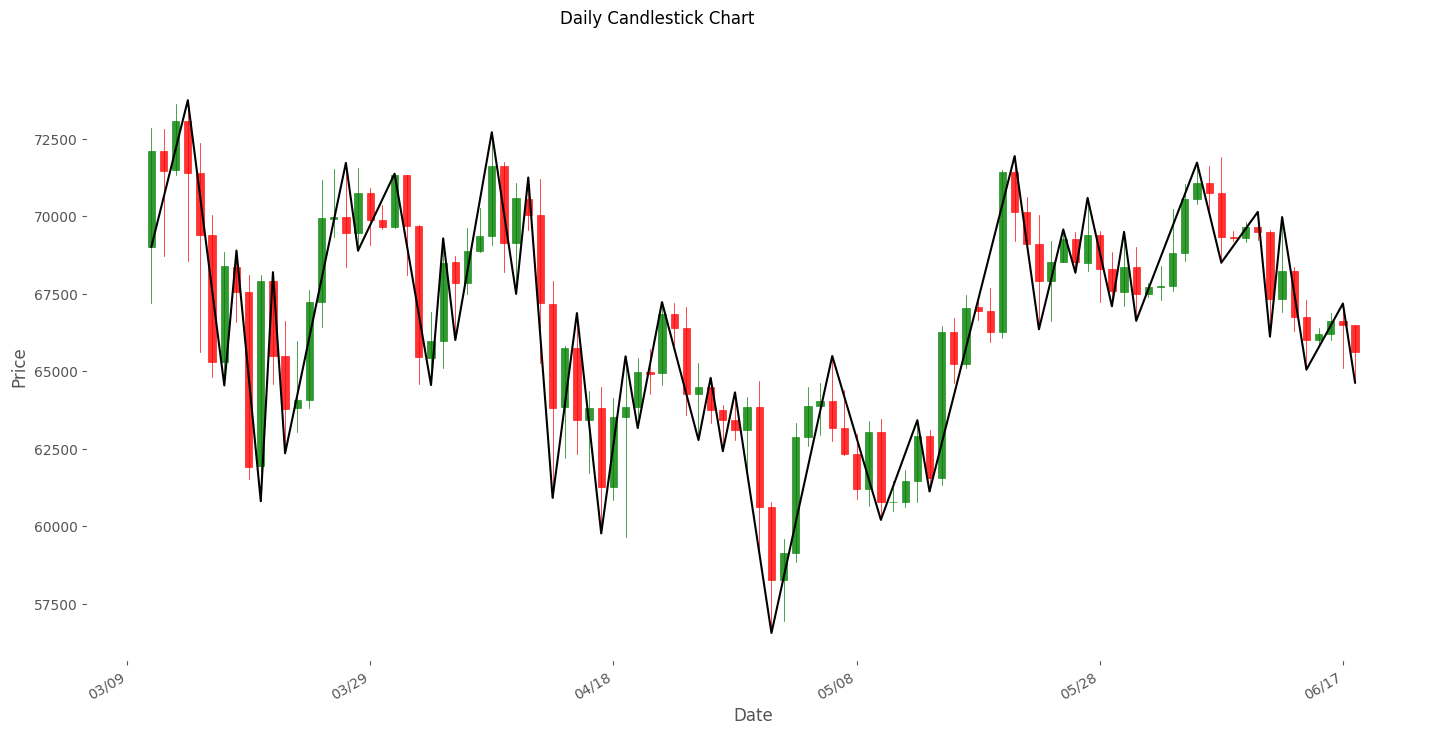

In [70]:
Plot

# **Some Extra Code**